In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import os

In [ ]:
df = pd.read_csv('/content/AAPL.csv')
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [ ]:
df = df['open'].values
df = df.reshape(-1, 1)
print(df.shape)
df[:5]

(1258, 1)


array([[130.34],
       [131.86],
       [131.23],
       [131.2 ],
       [129.86]])

In [ ]:

dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])
print(dataset_train.shape)
print(dataset_test.shape)

(1006, 1)
(302, 1)


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.28654638],
       [0.29734337],
       [0.29286831],
       [0.29265521],
       [0.28313681]])

In [ ]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.66699815],
       [0.67374627],
       [0.68049439],
       [0.69860776],
       [0.6835488 ]])

In [ ]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [ ]:
x_train, y_train = create_dataset(dataset_train)
x_train[:1]

array([[0.28654638, 0.29734337, 0.29286831, 0.29265521, 0.28313681,
        0.28881943, 0.28114789, 0.28057963, 0.27631766, 0.26069044,
        0.26935644, 0.27830658, 0.27123881, 0.25642847, 0.26303452,
        0.26793579, 0.26445518, 0.26786475, 0.26630203, 0.266231  ,
        0.26431311, 0.27603353, 0.26758062, 0.25188237, 0.25266373,
        0.2621111 , 0.25877255, 0.24818866, 0.25493678, 0.24492115,
        0.24044609, 0.22687882, 0.24882796, 0.25600227, 0.25372922,
        0.26807785, 0.27759625, 0.29102145, 0.30437562, 0.22723398,
        0.2571388 , 0.25088791, 0.23504759, 0.23710754, 0.23547379,
        0.22957807, 0.23156698, 0.22375337, 0.19477198, 0.16302032]])

In [ ]:

x_test, y_test = create_dataset(dataset_test)
x_test[:1]

array([[0.66699815, 0.67374627, 0.68049439, 0.69860776, 0.6835488 ,
        0.71047024, 0.7482597 , 0.72105413, 0.72214803, 0.70144907,
        0.70286973, 0.70912061, 0.72197755, 0.71807075, 0.73341384,
        0.74435289, 0.75614434, 0.75593124, 0.78363404, 0.77198466,
        0.78739878, 0.77567836, 0.77127433, 0.77752522, 0.77809348,
        0.80352323, 0.80146328, 0.81282853, 0.83364114, 0.8298764 ,
        0.81616707, 0.81261543, 0.80309703, 0.85154141, 0.85125728,
        0.85871573, 0.81183407, 0.82312829, 0.79485722, 0.7842023 ,
        0.76302742, 0.69406166, 0.68482739, 0.68383293, 0.70968888,
        0.6885211 , 0.66429891, 0.67637449, 0.67239665, 0.6378747 ]])

In [ ]:
# Reshape features for LSTM Layer
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
if(not os.path.exists('stock_prediction.h5')):
    model.fit(x_train, y_train, epochs=50, batch_size=32)
    model.save('stock_prediction.h5')

Epoch 1/50
30/30 [==============================] - 12s 169ms/step - loss: 0.0367
Epoch 2/50
30/30 [==============================] - 5s 166ms/step - loss: 0.0053
Epoch 3/50
30/30 [==============================] - 5s 165ms/step - loss: 0.0047
Epoch 4/50
30/30 [==============================] - 5s 167ms/step - loss: 0.0051
Epoch 5/50
30/30 [==============================] - 5s 165ms/step - loss: 0.0038
Epoch 6/50
30/30 [==============================] - 5s 168ms/step - loss: 0.0039
Epoch 7/50
30/30 [==============================] - 5s 166ms/step - loss: 0.0047
Epoch 8/50
30/30 [==============================] - 5s 167ms/step - loss: 0.0050
Epoch 9/50
30/30 [==============================] - 5s 166ms/step - loss: 0.0043
Epoch 10/50
30/30 [==============================] - 5s 170ms/step - loss: 0.0035
Epoch 11/50
30/30 [==============================] - 5s 165ms/step - loss: 0.0036
Epoch 12/50
30/30 [==============================] - 5s 167ms/step - loss: 0.0035
Epoch 13/50
30/30 [=====

In [ ]:
model = load_model('stock_prediction.h5')

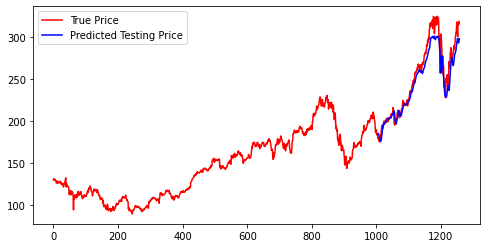

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df, color='red',  label="True Price")
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Testing Price')
plt.legend()

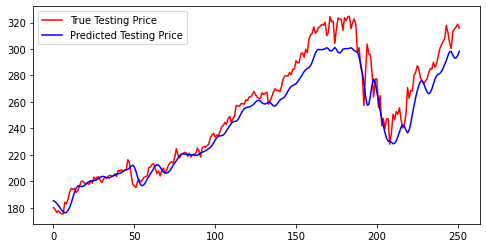

In [ ]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label='True Testing Price')
plt.plot(predictions, color='blue', label='Predicted Testing Price')
plt.legend()

In [ ]:
x = x_test[-1]
num_timesteps = 100
preds = []
for i in range(num_timesteps):
    data = np.expand_dims(x, axis=0)
    prediction = model.predict(data)
    prediction = scaler.inverse_transform(prediction)
    preds.append(prediction[0][0])
    x = np.delete(x, 0, axis=0) # delete first row
    x = np.vstack([x, prediction]) # add prediction

print(preds)

[298.1757, 449.77744, 509.8233, 529.4736, 538.41614, 542.60236, 544.94806, 546.36426, 547.2796, 547.89636, 548.3248, 548.6292, 548.84924, 549.011, 549.1312, 549.2217, 549.29034, 549.3435, 549.3849, 549.4178, 549.44434, 549.46674, 549.48584, 549.5028, 549.51764, 549.5307, 549.54144, 549.5502, 549.5576, 549.5656, 549.57605, 549.59155, 549.615, 549.64685, 549.6851, 549.7276, 549.7666, 549.799, 549.8235, 549.8443, 549.8732, 549.9278, 550.0238, 550.1709, 550.33374, 550.4608, 550.4945, 550.3703, 550.04, 549.4942, 548.76666, 548.7547, 548.75195, 548.75134, 548.7511, 548.75104, 548.7511, 548.7511, 548.7511, 548.75116, 548.7512, 548.7513, 548.75146, 548.7514, 548.75146, 548.75146, 548.7515, 548.75165, 548.7517, 548.7518, 548.75183, 548.7518, 548.7518, 548.75183, 548.7519, 548.75195, 548.752, 548.752, 548.7522, 548.7522, 548.75226, 548.75226, 548.7523, 548.75244, 548.75244, 548.75244, 548.75256, 548.7525, 548.75256, 548.7526, 548.7526, 548.7527, 548.75275, 548.7528, 548.7528, 548.75305, 548.7531